#  1.**Getting the data files in dataframe**

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('https://raw.githubusercontent.com/kuldeep27396/AVH/main/train-file.csv')
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [20]:
test = pd.read_csv('https://raw.githubusercontent.com/kuldeep27396/AVH/main/test-file.csv')
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [21]:
#copied train df to ff
ff= train.copy()

In [22]:
#copied test df to ff
gg = test.copy()

# EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


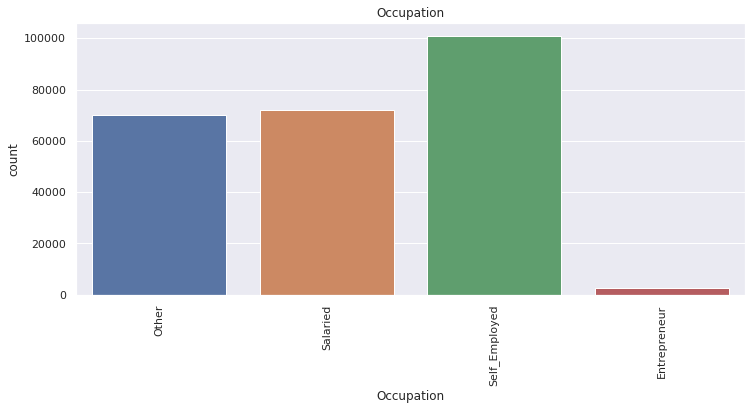

In [23]:
sns.countplot(train['Occupation']).tick_params(axis='x', rotation = 90)
plt.title('Occupation')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


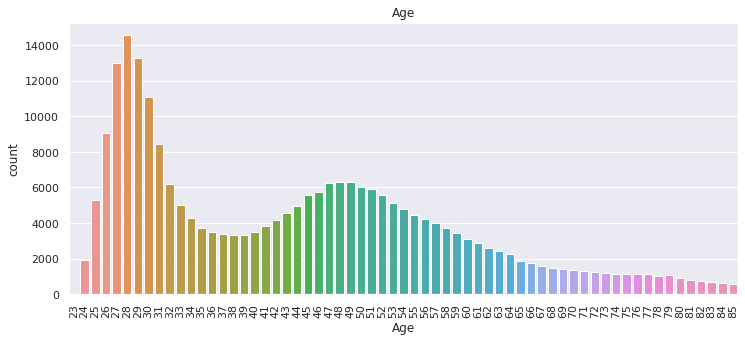

In [24]:
sns.set(rc={'figure.figsize':(12,5)})
sns.countplot(ff['Age']).tick_params(axis='x', rotation = 90)
plt.title('Age')
plt.show()

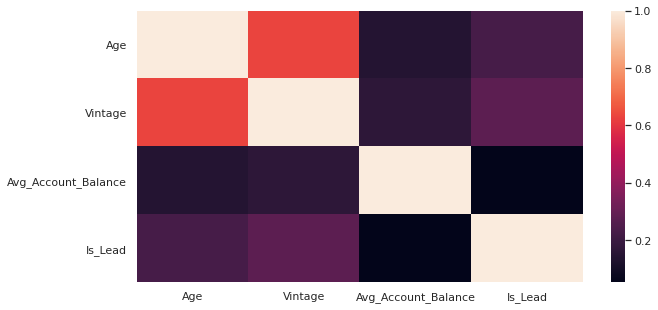

In [25]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(ff.corr())
plt.show()

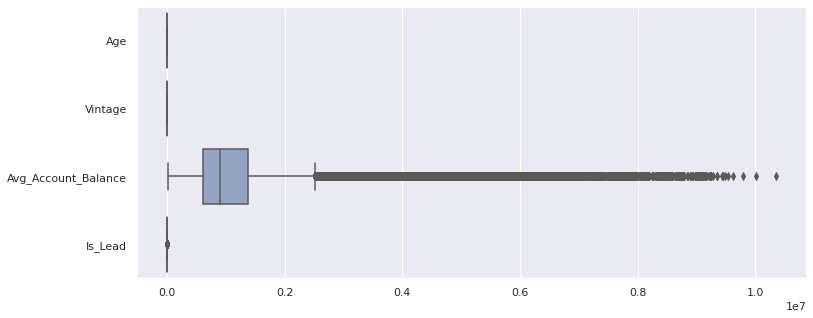

In [26]:
ax = sns.boxplot(data=ff, orient="h", palette="Set2")

# 2.**Train Data Preprocessing**



*   Converted **Credit_Product,Gender, Is_Active** to binary
*   Encoded **Occupation, Channel_code** to numeric
*   **Dropped ID from train as it has no corelation with our target**



In [27]:
import numpy as np
ff.replace(to_replace = np.nan, value =5, inplace =True) #replaced all Nan values to 5(selected random as it will not coincide with other variable)
ff['Credit_Product']=np.where(ff['Credit_Product']=='No',0,ff['Credit_Product'])
ff['Credit_Product']=np.where(ff['Credit_Product']=='Yes',1,ff['Credit_Product'])

ff['Is_Active'] = ff['Is_Active'].map({'Yes': 1, 'No': 0})
ff['Gender'] = ff['Gender'].map({'Male': 1, 'Female': 0})
ff['Occupation'] = ff['Occupation'].map({'Other': 0, 'Salaried': 1, 'Self_Employed': 2, 'Entrepreneur': 3})
ff['Channel_Code'] = ff['Channel_Code'].map({'X1': 0, 'X2': 1, 'X3': 2, 'X4': 3})
ff.drop(['ID'],axis =1, inplace = True)

Encode labels in column 'Region_Code'

In [28]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Region_Code'.
ff['Region_Code']= label_encoder.fit_transform(ff['Region_Code'])

ff['Region_Code'].unique()


array([18, 27, 20, 32, 11, 15, 33,  4, 19,  7, 29, 30,  2, 34,  9, 31,  8,
       16, 10, 24,  6, 25, 23, 17, 22,  1, 12, 14, 28, 26, 13,  0,  5,  3,
       21])

Avg_Account_Balance have outliers as shown in the image, I have done label encoding and also removed outliers as shown below.

Encode labels in column 'Avg_Account_Balance'

In [29]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Avg_Account_Balance'.
ff['Avg_Account_Balance']= label_encoder.fit_transform(ff['Avg_Account_Balance'])

ff['Avg_Account_Balance'].unique()

array([ 69898,  28951,  96873, ...,   9819, 112817,  76068])

In [30]:
#import re
#replace = re.compile("([a-zA-Z]+)")
#ff['Region_Code'] = ff['Region_Code'].astype(str).replace(replace, "")

In [31]:
#get the dataframe after transformation
ff.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,0,2,43,0,69898,0,0
1,0,30,27,1,0,32,0,28951,0,0
2,0,56,18,2,2,26,0,96873,1,0
3,1,34,20,1,0,19,0,18490,0,0
4,0,30,32,1,0,33,0,57050,0,0


Removing outliers from Avg_Account_Balance

In [32]:
# Importing
import sklearn
import pandas as pd

# IQR
Q1 = np.percentile(ff['Avg_Account_Balance'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(ff['Avg_Account_Balance'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", ff.shape)

# Upper bound
upper = np.where(ff['Avg_Account_Balance'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(ff['Avg_Account_Balance'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
ff.drop(upper[0], inplace = True)
ff.drop(lower[0], inplace = True)

print("New Shape: ", ff.shape)


Old Shape:  (245725, 10)
New Shape:  (245725, 10)


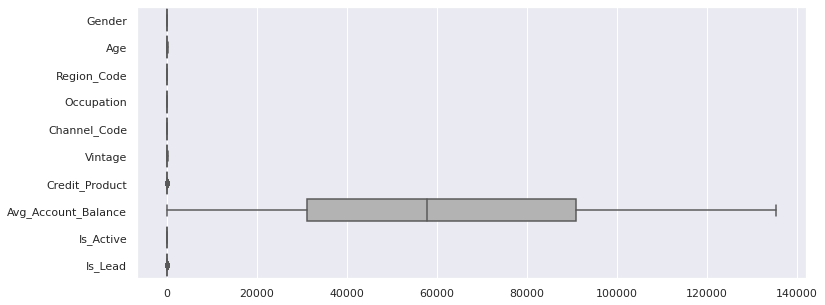

In [33]:
ax = sns.boxplot(data=ff, orient="h", palette="Set2")

In [34]:
ff['Credit_Product'].value_counts()

0    144357
1     72043
5     29325
Name: Credit_Product, dtype: int64

# 3.Test data processing

Everything will be same as train preprocessing

In [35]:
gg.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [36]:
gg.replace(to_replace = np.nan, value =5, inplace =True)
gg['Credit_Product']=np.where(gg['Credit_Product']=='No',0,gg['Credit_Product'])
gg['Credit_Product']=np.where(gg['Credit_Product']=='Yes',1,gg['Credit_Product'])

gg['Channel_Code'] = gg['Channel_Code'].map({'X1': 0, 'X2': 1, 'X3': 2, 'X4': 3})

gg['Gender'] = gg['Gender'].map({'Male': 1, 'Female': 0})

gg['Occupation'] = gg['Occupation'].map({'Other': 0, 'Salaried': 1, 'Self_Employed': 2, 'Entrepreneur': 3})
gg['Is_Active'] = gg['Is_Active'].map({'Yes': 1, 'No': 0})

In [37]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Avg_Account_Balance'.
gg['Avg_Account_Balance']= label_encoder.fit_transform(gg['Avg_Account_Balance'])

gg['Avg_Account_Balance'].unique()

array([27635, 37999,   732, ..., 48831, 63962, 18118])

In [38]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Region_Code'.
gg['Region_Code']= label_encoder.fit_transform(gg['Region_Code'])

gg['Region_Code'].unique()

array([ 4, 18, 20, 22,  3,  7, 34, 33, 27, 23, 11, 30, 24, 28, 19, 31,  1,
        2, 29, 32, 12, 13, 14,  6, 15, 10,  8, 21,  0, 25, 26, 17,  5,  9,
       16])

In [39]:
gg['Is_Active'].value_counts()

0    63797
1    41515
Name: Is_Active, dtype: int64

# 4.Test-Train Split

In [40]:
# Import the required library
from sklearn.model_selection import train_test_split

In [41]:
X = ff.drop(['Is_Lead'], 1)
X.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,73,18,0,2,43,0,69898,0
1,0,30,27,1,0,32,0,28951,0
2,0,56,18,2,2,26,0,96873,1
3,1,34,20,1,0,19,0,18490,0
4,0,30,32,1,0,33,0,57050,0


In [42]:
# Putting the target variable in y
y = ff['Is_Lead']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Is_Lead, dtype: int64

In [43]:
# Split the dataset into 70% and 30% for train and test respectively(taken with imp features)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [44]:
X_train['Is_Active'].value_counts()

0    105293
1     66714
Name: Is_Active, dtype: int64

#  5.Model Building : Logistic Regression

In [45]:
#Let's start with importing necessary libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [46]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Feature selection with RFE

In [47]:
# Running RFE with 6 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(log_reg,6)
rfe = rfe.fit(X_train, y_train)

In [48]:
rfe.support_

array([ True, False, False,  True,  True,  True,  True, False,  True])

In [49]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Gender', True, 1),
 ('Age', False, 2),
 ('Region_Code', False, 3),
 ('Occupation', True, 1),
 ('Channel_Code', True, 1),
 ('Vintage', True, 1),
 ('Credit_Product', True, 1),
 ('Avg_Account_Balance', False, 4),
 ('Is_Active', True, 1)]

In [50]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [51]:
col

Index(['Gender', 'Occupation', 'Channel_Code', 'Vintage', 'Credit_Product',
       'Is_Active'],
      dtype='object')

In [52]:
# Selecting columns selected by RFE
X_train1 = X_train[col]

In [53]:
X_train1

,Gender,Occupation,Channel_Code,Vintage,Credit_Product,Is_Active
40774,1,1,0,27,0,0
158466,1,2,2,45,1,0
82878,0,2,0,50,0,0
117102,1,1,0,14,0,0
28563,1,2,1,56,0,1
...,...,...,...,...,...,...
93553,1,2,1,32,1,0
181568,1,2,1,80,1,0
94735,1,0,0,44,0,0
236669,0,2,2,103,1,0


In [54]:
log_reg = LogisticRegression()

log_reg.fit(X_train1,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
X_test1 = X_test[col]

In [56]:
y_pred = log_reg.predict(X_test1)

In [57]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6994539379268162

# 6.Model Building: Catboost Classifier

In [58]:
!pip install CatBoost
from catboost import CatBoostClassifier

     |████████████████████████████████| 67.3MB 61kB/s 


In [59]:
#with all features
model2 = CatBoostClassifier(iterations=100)

# fit the model with the training data
model2.fit(X_train,y_train,plot=False)
print('\n Model Trainied')

# predict the target on the train dataset
predict_train = model2.predict(X_train)


Learning rate set to 0.5
0:	learn: 0.4840195	total: 85.9ms	remaining: 8.51s
1:	learn: 0.4107067	total: 117ms	remaining: 5.74s
2:	learn: 0.3808026	total: 149ms	remaining: 4.81s
3:	learn: 0.3677736	total: 180ms	remaining: 4.31s
4:	learn: 0.3541276	total: 216ms	remaining: 4.11s
5:	learn: 0.3490428	total: 254ms	remaining: 3.98s
6:	learn: 0.3468181	total: 287ms	remaining: 3.81s
7:	learn: 0.3453797	total: 325ms	remaining: 3.73s
8:	learn: 0.3450254	total: 354ms	remaining: 3.58s
9:	learn: 0.3444957	total: 386ms	remaining: 3.47s
10:	learn: 0.3440607	total: 418ms	remaining: 3.38s
11:	learn: 0.3438388	total: 458ms	remaining: 3.36s
12:	learn: 0.3436171	total: 491ms	remaining: 3.28s
13:	learn: 0.3429765	total: 522ms	remaining: 3.21s
14:	learn: 0.3428339	total: 553ms	remaining: 3.13s
15:	learn: 0.3426305	total: 588ms	remaining: 3.08s
16:	learn: 0.3424984	total: 621ms	remaining: 3.03s
17:	learn: 0.3424214	total: 657ms	remaining: 2.99s
18:	learn: 0.3420122	total: 690ms	remaining: 2.94s
19:	learn: 0.34

In [60]:
# Running RFE with 4 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(model2,7)
rfe = rfe.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.4840195	total: 32.6ms	remaining: 3.23s
1:	learn: 0.4107067	total: 63.9ms	remaining: 3.13s
2:	learn: 0.3808026	total: 96ms	remaining: 3.1s
3:	learn: 0.3677736	total: 126ms	remaining: 3.04s
4:	learn: 0.3541276	total: 159ms	remaining: 3.02s
5:	learn: 0.3490428	total: 193ms	remaining: 3.03s
6:	learn: 0.3468181	total: 225ms	remaining: 2.99s
7:	learn: 0.3453797	total: 258ms	remaining: 2.97s
8:	learn: 0.3450254	total: 288ms	remaining: 2.91s
9:	learn: 0.3444957	total: 319ms	remaining: 2.87s
10:	learn: 0.3440607	total: 349ms	remaining: 2.82s
11:	learn: 0.3438388	total: 380ms	remaining: 2.79s
12:	learn: 0.3436171	total: 416ms	remaining: 2.78s
13:	learn: 0.3429765	total: 450ms	remaining: 2.77s
14:	learn: 0.3428339	total: 480ms	remaining: 2.72s
15:	learn: 0.3426305	total: 513ms	remaining: 2.69s
16:	learn: 0.3424984	total: 545ms	remaining: 2.66s
17:	learn: 0.3424214	total: 578ms	remaining: 2.63s
18:	learn: 0.3420122	total: 609ms	remaining: 2.6s
19:	learn: 0.3418

In [61]:
rfe.support_

array([False,  True, False,  True,  True,  True,  True,  True,  True])

In [62]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Gender', False, 3),
 ('Age', True, 1),
 ('Region_Code', False, 2),
 ('Occupation', True, 1),
 ('Channel_Code', True, 1),
 ('Vintage', True, 1),
 ('Credit_Product', True, 1),
 ('Avg_Account_Balance', True, 1),
 ('Is_Active', True, 1)]

In [63]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [64]:
X_train11 = X_train[col]

In [65]:
#with all features
model2 = CatBoostClassifier(iterations=100)

# fit the model with the training data
model2.fit(X_train11,y_train,plot=False)
print('\n Model Trainied')

# predict the target on the train dataset
predict_train = model2.predict(X_train11)

Learning rate set to 0.5
0:	learn: 0.4787452	total: 33.2ms	remaining: 3.29s
1:	learn: 0.4065733	total: 65.5ms	remaining: 3.21s
2:	learn: 0.3741290	total: 97.7ms	remaining: 3.16s
3:	learn: 0.3613625	total: 130ms	remaining: 3.11s
4:	learn: 0.3552426	total: 159ms	remaining: 3.02s
5:	learn: 0.3529975	total: 192ms	remaining: 3.01s
6:	learn: 0.3494183	total: 224ms	remaining: 2.97s
7:	learn: 0.3462536	total: 255ms	remaining: 2.94s
8:	learn: 0.3456185	total: 286ms	remaining: 2.89s
9:	learn: 0.3450848	total: 316ms	remaining: 2.84s
10:	learn: 0.3446966	total: 347ms	remaining: 2.81s
11:	learn: 0.3445169	total: 376ms	remaining: 2.76s
12:	learn: 0.3435553	total: 411ms	remaining: 2.75s
13:	learn: 0.3435438	total: 435ms	remaining: 2.67s
14:	learn: 0.3433130	total: 465ms	remaining: 2.64s
15:	learn: 0.3430360	total: 496ms	remaining: 2.6s
16:	learn: 0.3425775	total: 527ms	remaining: 2.57s
17:	learn: 0.3424365	total: 558ms	remaining: 2.54s
18:	learn: 0.3423252	total: 588ms	remaining: 2.51s
19:	learn: 0.3

In [66]:
X_test11 = X_test[col]

In [67]:
y_pred11 = model2.predict(X_test11)
auc = roc_auc_score(y_test, y_pred11)
auc

0.7512887445265599

Improved AUC from 69 to 75

#  7.Model Building: ANN Classification

In [68]:
#converting to scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
from keras.models import Sequential
classifier = Sequential()

In [70]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [71]:
#Initializing Neural Network
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
Model = Sequential()
Model.add(Dense(64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
# Adding the second hidden layer
Model.add(Dense(48, kernel_initializer = 'uniform', activation = 'relu'))
Model.add(Dense(48, kernel_initializer = 'uniform', activation = 'relu'))
Model.add(Dense(48, kernel_initializer = 'uniform', activation = 'relu'))
Model.add(Dense(32, kernel_initializer = 'uniform', activation = 'tanh'))
Model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu'))
Model.add(Dropout(0.2))
# Adding the output layer
Model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling Neural Network
Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['AUC'],)
#fitting the neural Network
Model.fit(X_train, y_train, batch_size =48, epochs = 30)

Epoch 1/30
3584/3584 [==============================] - 23s 2ms/step - loss: 0.4000 - auc: 0.8232
Epoch 2/30
3584/3584 [==============================] - 7s 2ms/step - loss: 0.3631 - auc: 0.8579
Epoch 3/30
3584/3584 [==============================] - 7s 2ms/step - loss: 0.3553 - auc: 0.8625
Epoch 4/30
3584/3584 [==============================] - 7s 2ms/step - loss: 0.3498 - auc: 0.8676
Epoch 5/30
3584/3584 [==============================] - 7s 2ms/step - loss: 0.3471 - auc: 0.8681
Epoch 6/30
3584/3584 [==============================] - 7s 2ms/step - loss: 0.3500 - auc: 0.8654
Epoch 7/30
3584/3584 [==============================] - 7s 2ms/step - loss: 0.3508 - auc: 0.8671
Epoch 8/30
3584/3584 [==============================] - 7s 2ms/step - loss: 0.3476 - auc: 0.8693
Epoch 9/30
3584/3584 [==============================] - 7s 2ms/step - loss: 0.3484 - auc: 0.8686
Epoch 10/30
3584/3584 [==============================] - 7s 2ms/step - loss: 0.3467 - auc: 0.8706
Epoch 11/30
3584/3584 [=====

**Getting AUC** 

In [72]:
Y_prediction=Model.predict(X_test)
# Area Under Curve
auc = roc_auc_score(y_test, Y_prediction)
auc

0.8713652724144249

# **Got final AUC:0.8721**



1.   Got the testing data ID in ID column
2.   Dropped ID from testing data to do after preprocessing i.e. converting to Scaler



In [73]:
ID = gg['ID']
gg.drop(['ID'], axis =1, inplace =True)

Converting to Scaler the testing data

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train55 = sc.fit_transform(gg)

In [75]:
X_train55

array([[ 0.90829868, -0.99987782, -1.45176439, ...,  0.06952535,
        -0.45614794, -0.80668205],
       [ 0.90829868, -0.05856336, -0.16779796, ...,  2.61183556,
         0.0167183 , -0.80668205],
       [ 0.90829868, -0.86540432,  0.01562582, ..., -0.56605221,
        -1.68362001, -0.80668205],
       ...,
       [ 0.90829868, -0.59645734, -1.45176439, ..., -0.56605221,
         1.20130207, -0.80668205],
       [ 0.90829868,  0.6138041 , -1.45176439, ..., -0.56605221,
        -0.47010945,  1.23964578],
       [ 0.90829868, -1.13435131, -1.26834061, ..., -0.56605221,
        -0.8903691 , -0.80668205]])

Generating the submission file

In [76]:
y_pred = Model.predict(X_train55)
y_pred = (y_pred > 0.25)
submission_df = pd.DataFrame({'ID': ID,'Is_Lead': y_pred.flatten().astype(int),
})
submission_df.set_index('ID', inplace=True)
submission_df.to_csv('final_submission.csv')